# Part 1: Exploratory Data Analysis

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
with open('logins.json') as f:
    data = json.load(f)

In [3]:
for i in data.keys():
    print(i)

login_time


In [4]:
data['login_time'][0]

'1970-01-01 20:13:18'

In [5]:
logins = pd.DataFrame(data['login_time'], columns=['login_time'])
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
logins = pd.to_datetime(logins.login_time)

In [7]:
logins.info()

<class 'pandas.core.series.Series'>
RangeIndex: 93142 entries, 0 to 93141
Series name: login_time
Non-Null Count  Dtype         
--------------  -----         
93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [8]:
logins.index = logins

In [9]:
logins.head()

login_time
1970-01-01 20:13:18   1970-01-01 20:13:18
1970-01-01 20:16:10   1970-01-01 20:16:10
1970-01-01 20:16:37   1970-01-01 20:16:37
1970-01-01 20:16:36   1970-01-01 20:16:36
1970-01-01 20:26:21   1970-01-01 20:26:21
Name: login_time, dtype: datetime64[ns]

In [10]:
logins = logins.resample('15min').count()

In [11]:
logins.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: login_time, dtype: int64

### Plot the time series data in 15 min intervals

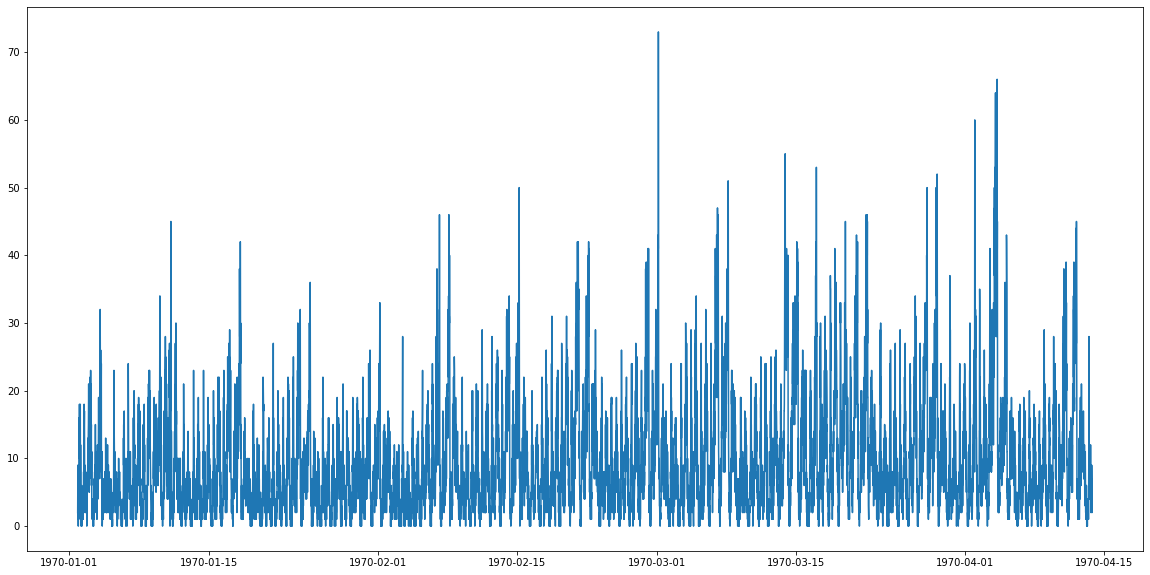

In [12]:
plt.figure(figsize=(20,10))
plt.plot(logins)

<AxesSubplot:title={'center':'Seasonality'}, xlabel='login_time'>

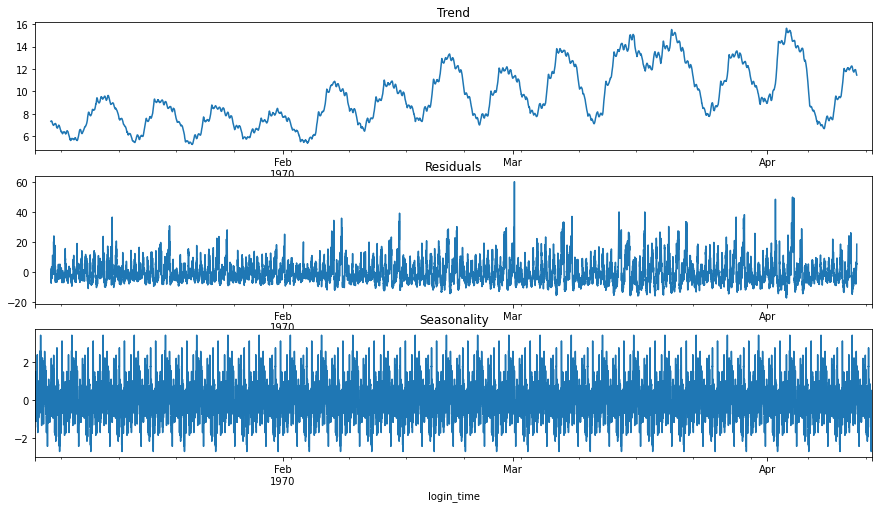

In [13]:
decompose = seasonal_decompose(logins, period=365)

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,8))
ax1.set_title(label='Trend')
decompose.trend.plot(ax=ax1)
ax2.set_title('Residuals')
decompose.resid.plot(ax=ax2)
ax3.set_title('Seasonality')
decompose.seasonal.plot(ax=ax3)

In [14]:
jan = logins.loc[:'1970-01-31']

<AxesSubplot:title={'center':'Seasonality'}, xlabel='login_time'>

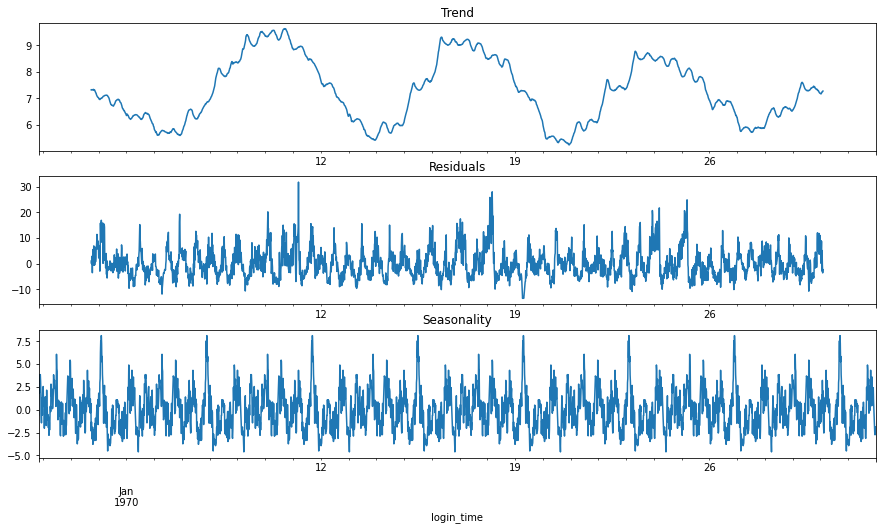

In [15]:
jan_deompose = seasonal_decompose(jan, period=365)

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,8))
ax1.set_title(label='Trend')
jan_deompose.trend.plot(ax=ax1)
ax2.set_title('Residuals')
jan_deompose.resid.plot(ax=ax2)
ax3.set_title('Seasonality')
jan_deompose.seasonal.plot(ax=ax3)